In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_df = pd.read_csv('/Users/alexlei/Documents/customer_sensitivity.csv')
pd.set_option('display.max_columns', None)
customer_df.head()

/var/folders/29/dmw7b_6j5w999w4qp0m3znym0000gp/T/ipykernel_57583/1967686817.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df = pd.read_csv('/Users/alexlei/Documents/customer_sensitivity.csv')


,SUBMISSION_UUID,CUSTOMER_SENSITIVITY_TARGET,SUBMISSION_DATE,DEAL_TYPE,PROGRAM,IS_PRIME_DEAL,SUBMISSION_CATEGORY,STAGE_NAME,SUB_STAGE,MAX_APPROVAL_ISSUED,TERM_MAX_OFFER,BUY_RATE_MAX_OFFER,UPSELL_MAX_OFFER,AMOUNT_ACCEPTED_OFFER,STIP_COUNT,STIPULATIONS,DATE_APPROVED,AVERAGE_TRUE_REVENUE,IS_PREVIOUSLY_FUNDED_CUSTOMER,APBUS_YRS_IN_BUSINESS,APBUS_ENTITY_TYPE,BSMET_DEPOSIT_COUNT_MIN,BSMET_NSFS_AVG,BSMET_REVENUE_VELOCITY,BSMET_NSFS_VELOCITY,BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS,PNSCO_PAYNET_SCORE,EMSCO_INTELLISCORE,EMSCO_INTELLISCORE_BUCKET,EMSCO_IP_SCORE,EMSCO_FSR_SCORE,EMSCO_SBCS_V2_ACQ_SCORE,ENSCO_SCORE_FICO_MAX,ENSCO_SCORE_VANTAGE_MAX,ENSCO_SCORE_BANKRUPTCY_MAX,ENAGG_DELINQUENCIES_OVER_30CD_MAX,ENTRA_CRE_MAX_YEARS_SINCE_OPENED_MAX,ENTRA_CRE_DELINQ_CNT_30D_MAX,FIRST_INFERENCE_MODEL_VERSION,FIRST_INFERENCE_MODEL_PREDICTION,FIRST_INFERENCE_MODEL_RISK_SCORE,FIRST_DECISION,POSITIONS,ISO_COMPETING_SUB,FIRST_PARTNER_NAME
0,5affeba1-c9d2-4c32-b515-b27c499c2e9f,False,2025-03-11 15:09:12.067,New Deal,Premium,True,new_sales,Closed Lost,Deal Lost,350000.0,18.0,1.33,0.15,NaN,2.0,"""12 Month Bank Verification, Tax Return""",2025-03-12 08:58:35.472,435446.52,False,31.88,Limited Liability Company (LLC),4.0,0.0,0.4483,0.333,0.0000,674.0,36.0,MEDIUM-HIGH RISK,11.0,13.0,28.0,640.0,672.0,64.0,2.0,34.08,1.0,6.1.2,1.0000,20.0,2025-03-12 08:58:57.000,0.0,NaN,Lending Tree
1,b19dd23b-38c5-41cd-b51a-796782894131,True,2025-03-11 15:13:39.670,New Deal,Core,False,new_sales,Funded,NaN,25000.0,6.0,1.38,0.15,25000.0,NaN,NaN,2025-03-18 17:44:26.207,47502.67,False,1.32,Limited Liability Company (LLC),8.0,0.0,0.2994,0.333,0.0000,NaN,6.0,HIGH RISK,89.0,80.0,25.0,750.0,712.0,270.0,0.0,1.42,0.0,6.1.2,0.7753,5.0,2025-03-11 17:36:41.000,0.0,NaN,Lendio
2,a8e3a848-9a0d-4b75-ac1a-7d60610e7edf,False,2025-03-11 14:12:17.801,New Deal,Premium,False,new_sales,Closed Lost,Deal Lost,150000.0,10.0,1.29,0.15,NaN,NaN,NaN,2025-03-11 17:00:38.292,472645.69,False,12.16,Corporation,9.0,0.0,0.2197,0.333,0.0500,690.0,82.0,LOW-MEDIUM RISK,74.0,87.0,44.0,746.0,667.0,303.0,1.0,34.42,0.0,6.1.2,0.9766,19.0,2025-03-11 17:01:18.000,1.0,NaN,Riverpoint Capital
3,b9ce2b93-36d7-49d5-aa34-70862eca3165,True,2025-03-11 13:57:41.719,New Deal,Standard,False,new_sales,Funded,NaN,20000.0,7.0,1.34,0.15,20000.0,NaN,NaN,2025-03-11 16:50:47.060,35907.78,False,11.70,Limited Liability Company (LLC),10.0,0.0,0.3562,0.333,0.0821,NaN,90.0,LOW RISK,47.0,13.0,30.0,644.0,596.0,903.0,0.0,11.25,0.0,6.1.2,0.8281,9.0,2025-03-11 16:51:08.000,1.0,NaN,Twin Fold Capital
4,0937ee3f-9cbc-4108-809f-ff224707594a,True,2025-03-11 15:06:22.889,New Deal,Standard,False,new_sales,Funded,NaN,7500.0,7.0,1.34,0.15,7500.0,1.0,"""Accounts Must Be Positive Before Funding""",2025-03-11 17:24:01.407,13652.54,False,5.58,Limited Liability Company (LLC),26.0,0.0,0.3045,0.333,0.1476,675.0,11.0,HIGH RISK,28.0,22.0,44.0,594.0,648.0,819.0,0.0,9.58,0.0,6.1.2,0.8805,13.0,2025-03-11 17:24:30.000,1.0,NaN,New York Tribeca Group LLC


### Time_Difference Column

In [3]:
customer_df[['SUBMISSION_DATE', 'DATE_APPROVED', 'FIRST_DECISION']] = customer_df[['SUBMISSION_DATE', 'DATE_APPROVED', 'FIRST_DECISION']].apply(pd.to_datetime, errors='coerce')

In [4]:
def calculate_time_difference(df, start_time_col, end_time_col):
    df['time_difference'] = df[end_time_col] - df[start_time_col]
    df['time_difference_minutes'] = df['time_difference'].dt.total_seconds() // 60
    df['hour_difference'] = df['time_difference_minutes'] // 60
    df['minute_diference'] = df['time_difference_minutes'] % 60
    return df

In [5]:
customer_df = calculate_time_difference(customer_df, 'SUBMISSION_DATE', 'FIRST_DECISION')

### Stage_Name to Binary

In [6]:
customer_df['STAGE_NAME'] = customer_df['STAGE_NAME'].map({'Funded': 1, 'Closed Lost': 0})
print(customer_df['STAGE_NAME'].value_counts())

STAGE_NAME
0    223311
1     19928
Name: count, dtype: int64


### Change ISO_COMPETING_SUB to numeric values

In [7]:
customer_df['ISO_COMPETING_SUB'] = customer_df['ISO_COMPETING_SUB'].replace('Competing Sub - Complete', 1)
customer_df['ISO_COMPETING_SUB'] = customer_df['ISO_COMPETING_SUB'].fillna(0)
print(customer_df['ISO_COMPETING_SUB'].value_counts(dropna=False))

ISO_COMPETING_SUB
0.0    225992
1.0     17247
Name: count, dtype: int64


### Intelliscore_Bucket to num values

In [8]:
customer_df['EMSCO_INTELLISCORE_BUCKET'] = customer_df['EMSCO_INTELLISCORE_BUCKET'].replace(['INSUFFICIENT DATA TO SCORE', 'NaN', 'RECENT BANKRUPTCY ON FILE'], np.nan)
print(customer_df['EMSCO_INTELLISCORE_BUCKET'].value_counts(dropna=False))

EMSCO_INTELLISCORE_BUCKET
HIGH RISK           114552
MEDIUM-HIGH RISK     56488
MEDIUM RISK          35884
LOW-MEDIUM RISK      16142
NaN                  11166
LOW RISK              9007
Name: count, dtype: int64


### Program column mapping

In [9]:
program_mapping = {
    'Starter': 1,
    'Core': 2,
    'Standard': 3,
    'Low Risk': 4,
    'Premium': 5
}

customer_df['PROGRAM'] = customer_df['PROGRAM'].map(program_mapping)

### Risk_Score mapping

In [10]:
risk_score_mapping = {
    'HIGH RISK': 1,
    'MEDIUM-HIGH RISK': 2,
    'MEDIUM RISK': 3,
    'LOW-MEDIUM RISK': 4,
    'LOW RISK': 5
}

customer_df['EMSCO_INTELLISCORE_BUCKET'] = customer_df['EMSCO_INTELLISCORE_BUCKET'].map(risk_score_mapping)

### IS_PRIME_DEAL column - binary

In [11]:
customer_df[customer_df['IS_PRIME_DEAL'].isnull()]
customer_df['IS_PRIME_DEAL'] = customer_df['IS_PRIME_DEAL'].fillna(0)

In [12]:
customer_df['IS_PRIME_DEAL'] = customer_df['IS_PRIME_DEAL'].astype(int)

### Remove target leak variables

In [13]:
customer_df = customer_df.drop(['SUBMISSION_UUID', 'CUSTOMER_SENSITIVITY_TARGET', 'SUBMISSION_DATE', 'DEAL_TYPE', 'SUBMISSION_CATEGORY', 'SUB_STAGE', 'STIPULATIONS', 'DATE_APPROVED', 
                'APBUS_ENTITY_TYPE', 'FIRST_DECISION', 'time_difference', 'hour_difference', 'minute_diference', 'FIRST_INFERENCE_MODEL_VERSION',
                'AMOUNT_ACCEPTED_OFFER'], axis=1)
customer_df.head()

,PROGRAM,IS_PRIME_DEAL,STAGE_NAME,MAX_APPROVAL_ISSUED,TERM_MAX_OFFER,BUY_RATE_MAX_OFFER,UPSELL_MAX_OFFER,STIP_COUNT,AVERAGE_TRUE_REVENUE,IS_PREVIOUSLY_FUNDED_CUSTOMER,APBUS_YRS_IN_BUSINESS,BSMET_DEPOSIT_COUNT_MIN,BSMET_NSFS_AVG,BSMET_REVENUE_VELOCITY,BSMET_NSFS_VELOCITY,BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS,PNSCO_PAYNET_SCORE,EMSCO_INTELLISCORE,EMSCO_INTELLISCORE_BUCKET,EMSCO_IP_SCORE,EMSCO_FSR_SCORE,EMSCO_SBCS_V2_ACQ_SCORE,ENSCO_SCORE_FICO_MAX,ENSCO_SCORE_VANTAGE_MAX,ENSCO_SCORE_BANKRUPTCY_MAX,ENAGG_DELINQUENCIES_OVER_30CD_MAX,ENTRA_CRE_MAX_YEARS_SINCE_OPENED_MAX,ENTRA_CRE_DELINQ_CNT_30D_MAX,FIRST_INFERENCE_MODEL_PREDICTION,FIRST_INFERENCE_MODEL_RISK_SCORE,POSITIONS,ISO_COMPETING_SUB,FIRST_PARTNER_NAME,time_difference_minutes
0,5.0,1,0,350000.0,18.0,1.33,0.15,2.0,435446.52,False,31.88,4.0,0.0,0.4483,0.333,0.0000,674.0,36.0,2.0,11.0,13.0,28.0,640.0,672.0,64.0,2.0,34.08,1.0,1.0000,20.0,0.0,0.0,Lending Tree,1069.0
1,2.0,0,1,25000.0,6.0,1.38,0.15,NaN,47502.67,False,1.32,8.0,0.0,0.2994,0.333,0.0000,NaN,6.0,1.0,89.0,80.0,25.0,750.0,712.0,270.0,0.0,1.42,0.0,0.7753,5.0,0.0,0.0,Lendio,143.0
2,5.0,0,0,150000.0,10.0,1.29,0.15,NaN,472645.69,False,12.16,9.0,0.0,0.2197,0.333,0.0500,690.0,82.0,4.0,74.0,87.0,44.0,746.0,667.0,303.0,1.0,34.42,0.0,0.9766,19.0,1.0,0.0,Riverpoint Capital,169.0
3,3.0,0,1,20000.0,7.0,1.34,0.15,NaN,35907.78,False,11.70,10.0,0.0,0.3562,0.333,0.0821,NaN,90.0,5.0,47.0,13.0,30.0,644.0,596.0,903.0,0.0,11.25,0.0,0.8281,9.0,1.0,0.0,Twin Fold Capital,173.0
4,3.0,0,1,7500.0,7.0,1.34,0.15,1.0,13652.54,False,5.58,26.0,0.0,0.3045,0.333,0.1476,675.0,11.0,1.0,28.0,22.0,44.0,594.0,648.0,819.0,0.0,9.58,0.0,0.8805,13.0,1.0,0.0,New York Tribeca Group LLC,138.0


### Train_Test_Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = customer_df.drop('STAGE_NAME', axis=1)
y = customer_df['STAGE_NAME']

# Training and Testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)

### FIRST_PARTNER_NAME encoding (post-split)

In [17]:
# frequency encoding

In [18]:
iso_freq = X_train['FIRST_PARTNER_NAME'].value_counts()

In [19]:
# Training set
X_train['iso_name_freq'] = X_train['FIRST_PARTNER_NAME'].map(iso_freq)

In [20]:
# Validation set
X_val['iso_name_freq'] = X_val['FIRST_PARTNER_NAME'].map(iso_freq)
X_val['iso_name_freq'] = X_val['iso_name_freq'].fillna(0)

In [21]:
# Testing set
X_test['iso_name_freq'] = X_test['FIRST_PARTNER_NAME'].map(iso_freq)
X_test['iso_name_freq'] = X_test['iso_name_freq'].fillna(0)

In [22]:
# drop 'FIRST_PARTNER_NAME' column
X_train.drop('FIRST_PARTNER_NAME', axis = 1, inplace=True)
X_val.drop('FIRST_PARTNER_NAME', axis = 1, inplace=True)
X_test.drop('FIRST_PARTNER_NAME', axis = 1, inplace=True)

### Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### XGBoost

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [26]:
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=4, use_label_encoder=False, eval_metric='logloss', random_state=42)

In [27]:
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

[0]	validation_0-logloss:0.28179
[1]	validation_0-logloss:0.28045
[2]	validation_0-logloss:0.27903
[3]	validation_0-logloss:0.27779
[4]	validation_0-logloss:0.27656
[5]	validation_0-logloss:0.27551
[6]	validation_0-logloss:0.27447
[7]	validation_0-logloss:0.27360
[8]	validation_0-logloss:0.27280
[9]	validation_0-logloss:0.27200
[10]	validation_0-logloss:0.27122
[11]	validation_0-logloss:0.27061
[12]	validation_0-logloss:0.26998
[13]	validation_0-logloss:0.26947
[14]	validation_0-logloss:0.26883
[15]	validation_0-logloss:0.26822


/Users/alexlei/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [06:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[16]	validation_0-logloss:0.26772
[17]	validation_0-logloss:0.26723
[18]	validation_0-logloss:0.26685
[19]	validation_0-logloss:0.26641
[20]	validation_0-logloss:0.26601
[21]	validation_0-logloss:0.26554
[22]	validation_0-logloss:0.26517
[23]	validation_0-logloss:0.26478
[24]	validation_0-logloss:0.26449
[25]	validation_0-logloss:0.26417
[26]	validation_0-logloss:0.26384
[27]	validation_0-logloss:0.26349
[28]	validation_0-logloss:0.26326
[29]	validation_0-logloss:0.26297
[30]	validation_0-logloss:0.26273
[31]	validation_0-logloss:0.26247
[32]	validation_0-logloss:0.26228
[33]	validation_0-logloss:0.26205
[34]	validation_0-logloss:0.26185
[35]	validation_0-logloss:0.26167
[36]	validation_0-logloss:0.26145
[37]	validation_0-logloss:0.26125
[38]	validation_0-logloss:0.26106
[39]	validation_0-logloss:0.26085
[40]	validation_0-logloss:0.26072
[41]	validation_0-logloss:0.26053
[42]	validation_0-logloss:0.26037
[43]	validation_0-logloss:0.26023
[44]	validation_0-logloss:0.26005
[45]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
# Comparing training and testing ROC AUC scores
y_train_proba = xgb_model.predict_proba(X_train)[:, 1]
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

In [29]:
roc_auc_train = roc_auc_score(y_train, y_train_proba)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

In [30]:
print(f"Train ROC AUC Score: {roc_auc_train}")
print(f"Test ROC AUC Score: {roc_auc_test}")

Train ROC AUC Score: 0.843285833959968
Test ROC AUC Score: 0.7463769514558399


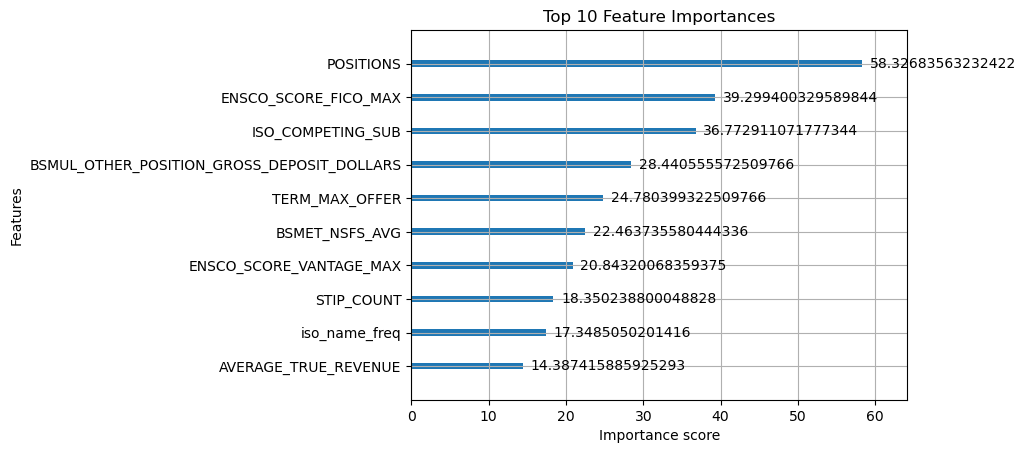

In [31]:
# check feature importance
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()

# Additional Tasks If Needed:

### Heatmap for Correlations

In [32]:
# total counts for each ISO name
iso_counts = customer_df['FIRST_PARTNER_NAME'].value_counts()
# new column
customer_df['iso_name_counts'] = customer_df['FIRST_PARTNER_NAME'].map(iso_counts)
# fill NA with 0
customer_df['iso_name_counts'] = customer_df['iso_name_counts'].fillna(0)
# drop column
customer_df.drop('FIRST_PARTNER_NAME', axis=1, inplace=True)

# check
customer_df

,PROGRAM,IS_PRIME_DEAL,STAGE_NAME,MAX_APPROVAL_ISSUED,TERM_MAX_OFFER,BUY_RATE_MAX_OFFER,UPSELL_MAX_OFFER,STIP_COUNT,AVERAGE_TRUE_REVENUE,IS_PREVIOUSLY_FUNDED_CUSTOMER,APBUS_YRS_IN_BUSINESS,BSMET_DEPOSIT_COUNT_MIN,BSMET_NSFS_AVG,BSMET_REVENUE_VELOCITY,BSMET_NSFS_VELOCITY,BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS,PNSCO_PAYNET_SCORE,EMSCO_INTELLISCORE,EMSCO_INTELLISCORE_BUCKET,EMSCO_IP_SCORE,EMSCO_FSR_SCORE,EMSCO_SBCS_V2_ACQ_SCORE,ENSCO_SCORE_FICO_MAX,ENSCO_SCORE_VANTAGE_MAX,ENSCO_SCORE_BANKRUPTCY_MAX,ENAGG_DELINQUENCIES_OVER_30CD_MAX,ENTRA_CRE_MAX_YEARS_SINCE_OPENED_MAX,ENTRA_CRE_DELINQ_CNT_30D_MAX,FIRST_INFERENCE_MODEL_PREDICTION,FIRST_INFERENCE_MODEL_RISK_SCORE,POSITIONS,ISO_COMPETING_SUB,time_difference_minutes,iso_name_counts
0,5.0,1,0,350000.0,18.0,1.33,0.15,2.0,435446.52,False,31.88,4.0,0.00,0.4483,0.3330,0.0000,674.0,36.0,2.0,11.0,13.0,28.0,640.0,672.0,64.0,2.0,34.08,1.0,1.0000,20.0,0.0,0.0,1069.0,12013.0
1,2.0,0,1,25000.0,6.0,1.38,0.15,NaN,47502.67,False,1.32,8.0,0.00,0.2994,0.3330,0.0000,NaN,6.0,1.0,89.0,80.0,25.0,750.0,712.0,270.0,0.0,1.42,0.0,0.7753,5.0,0.0,0.0,143.0,33129.0
2,5.0,0,0,150000.0,10.0,1.29,0.15,NaN,472645.69,False,12.16,9.0,0.00,0.2197,0.3330,0.0500,690.0,82.0,4.0,74.0,87.0,44.0,746.0,667.0,303.0,1.0,34.42,0.0,0.9766,19.0,1.0,0.0,169.0,1684.0
3,3.0,0,1,20000.0,7.0,1.34,0.15,NaN,35907.78,False,11.70,10.0,0.00,0.3562,0.3330,0.0821,NaN,90.0,5.0,47.0,13.0,30.0,644.0,596.0,903.0,0.0,11.25,0.0,0.8281,9.0,1.0,0.0,173.0,435.0
4,3.0,0,1,7500.0,7.0,1.34,0.15,1.0,13652.54,False,5.58,26.0,0.00,0.3045,0.3330,0.1476,675.0,11.0,1.0,28.0,22.0,44.0,594.0,648.0,819.0,0.0,9.58,0.0,0.8805,13.0,1.0,0.0,138.0,1565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243234,5.0,0,0,425000.0,15.0,1.31,0.15,2.0,1000779.35,False,5.93,49.0,0.00,0.4103,0.3330,0.0000,715.0,34.0,2.0,14.0,17.0,20.0,605.0,647.0,358.0,15.0,16.25,2.0,0.8894,14.0,0.0,0.0,1497.0,33129.0
243235,3.0,0,0,20000.0,6.0,1.32,0.15,NaN,31651.60,False,2.77,32.0,11.33,0.2147,0.7941,0.0000,NaN,1.0,1.0,15.0,2.0,2.0,696.0,596.0,849.0,4.0,10.67,0.0,0.7630,5.0,0.0,0.0,1115.0,4945.0
243236,4.0,0,0,30000.0,8.0,1.30,0.15,NaN,31657.57,False,7.93,3.0,0.00,0.1664,0.3330,0.0000,695.0,46.0,3.0,41.0,9.0,34.0,607.0,623.0,601.0,9.0,13.08,0.0,0.9314,17.0,0.0,0.0,1111.0,33129.0
243237,3.0,0,0,100000.0,7.0,1.34,0.15,1.0,252096.27,False,4.52,11.0,0.00,0.3038,0.3330,0.0000,645.0,74.0,4.0,50.0,9.0,45.0,629.0,660.0,673.0,0.0,8.42,0.0,0.8177,8.0,0.0,0.0,1290.0,3871.0


In [33]:
corr_target = customer_df.corr()['STAGE_NAME'].sort_values(ascending=False)
top_features = corr_target[1:11].index # top 10 features

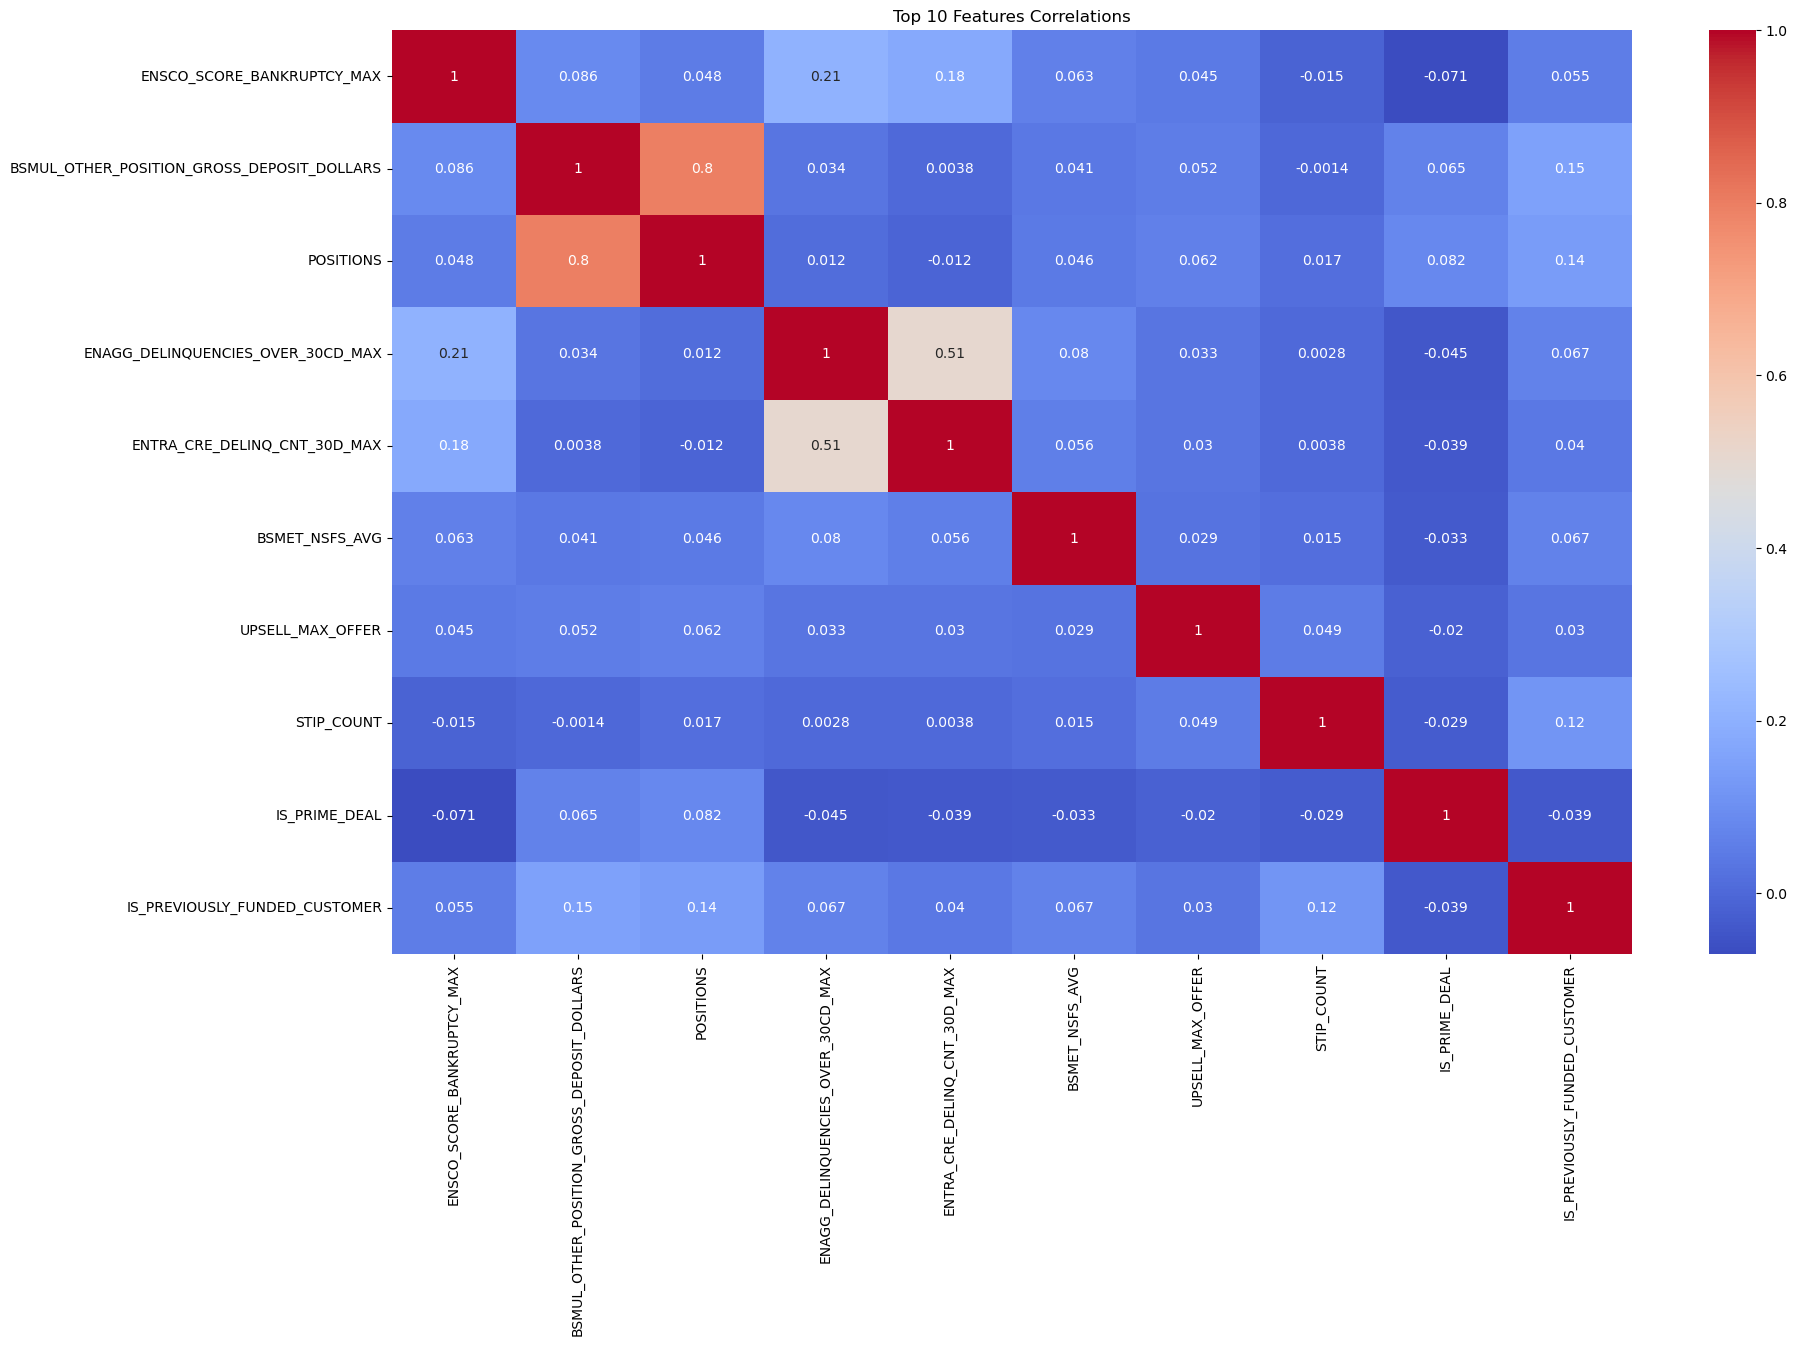

In [34]:
# sns.heatmap(customer_df.corr(), annot=True, cmap='coolwarm')

plt.figure(figsize=(20,12))
sns.heatmap(customer_df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Features Correlations")
plt.show()